# Método de newton-raphson

Es el método más usado  y trabaja como referencia la pendiente ($m$) de la recta tangente en una raíz $x_i$ incial para hallar el $x_{i+1}$.

Este método tiende a acercarse muy rápido a la raíz. Pero también puede tender a la divergencia rápidamente.

<p align="center">
<img src="https://www.neurochispas.com/wp-content/uploads/2022/12/Diagrama-para-provar-el-metodo-de-Newton-Raphson.png" width=500/>

$$f'(x_i)= \frac{f(xi)-0}{x_i - x_{i+1}}$$
$$f'(x_i)[x_i - x_{i+1}] = f(x_i)$$
$$f'(x_i)(x_i) - f'(x_i)(x_{i+1}) = f(x_i)$$
$$f'(x_i)(x_{i+1}) = f'(x_i)(x_i) - f(x_i)$$

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $$

## Algoritmo de Newton Raphson

1. Se calcula el siguiente $x_{i+1}$ con la formula.

  $$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $$

2. Se repite el paso **1** hasta convergencia.

### Error relativo
$$
e_r = \lvert \frac{x_{i+1}-x_{i}}{x_{i+1}}\rvert
$$

### Tolerancia

Precisión que se requiere en el método!!

## Veamos un ejemplo práctico

Hallar la raíz de $f(x)= e^{-x} - x$ con el método de Newton Raphson y una condición inicial $x_i=0$ y $tol = 1\%$

### Solución

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
# Tomamos el intérvalo inicial y grafiquemos la función dentro de ese valor

x = sp.symbols('x')

y = sp.E**(-x)-x
print("La función es: ",y)

xi = 0

print(f"El punto inicial es: {xi} ")

fxi = round(y.subs({x: xi}), 4)
print(f"la función evaluada en xi : f({xi})={fxi}")

La función es:  -x + exp(-x)
El punto inicial es: 0 
la función evaluada en xi : f(0)=1


<Figure size 640x480 with 0 Axes>

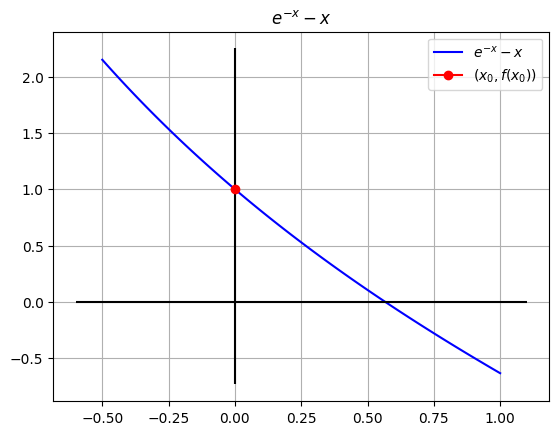

In [ ]:
# @title Gráfica incial de la función y $x_i$ dado
import numpy as np
plt.figure()

r = np.linspace(-0.5,1, 100)
fx = [y.subs({x:x_i}) for x_i in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$e^{-x} - x$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.1,ymax=max(fx)+0.1,color='k')
ax.hlines(y=0,xmin=min(r)-0.1,xmax=max(r)+0.1,color='k')

## Punto inicial

ax.plot([xi],[fxi], color='red', marker='o', label='$(x_0,f(x_0))$')

ax.set_title("$e^{-x} - x$")
ax.grid()
ax.legend()
plt.show()

#### Formula para el cálculo del $x_{i+1}$ en el ejercicio dado
$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} = x_i - \frac{e^{-x} - x}{-e^{-x} - 1}$$

In [ ]:
# Calculamos la derivada de la función
dy = y.diff()
print(f"La derivada de la función f(x)={y} -> \t f'(x)= {dy}")

# Evaluemos la derivada en x_i

dfxi = round(dy.subs({x:xi}),4)
print(f"La derivada evaluada en xi f'(xi)= {dfxi}")

La derivada de la función f(x)=-x + exp(-x) -> 	 f'(x)= -1 - exp(-x)
La derivada evaluada en xi f'(xi)= -2


In [ ]:
# Calculemos el x_i+1 (siguiente)

xs = round(xi - ((fxi)/(dfxi)),4)
print(f"La raíz supuesta está en x={xs}")

La raíz supuesta está en x=0.5000


<Figure size 640x480 with 0 Axes>

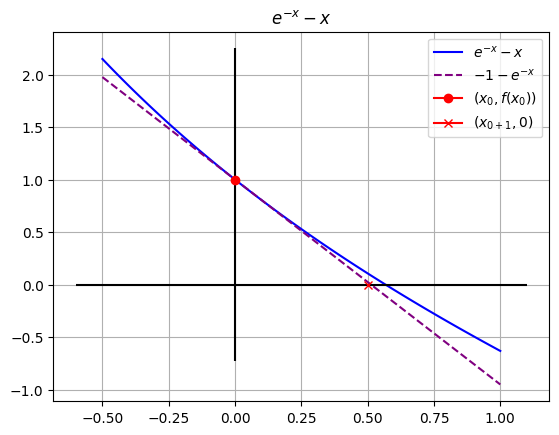

In [ ]:
# @title Gráfica función con el $x_i$ y $x_{i+1}$ calculado
import numpy as np
plt.figure()

r = np.linspace(-0.5,1, 100)
fx = [y.subs({x:x_i}) for x_i in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$e^{-x} - x$")

h=0.1
dfx = (y.subs({x:xi+h})-y.subs({x:xi}))/h # derivative
tan = y.subs({x:xi})+dfx*(r-xi)  # tangent
ax.plot(r,tan,color='purple',linestyle='--',label=f"${sp.latex(dy)}$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.1,ymax=max(fx)+0.1,color='k')
ax.hlines(y=0,xmin=min(r)-0.1,xmax=max(r)+0.1,color='k')

## Punto inicial

ax.plot([xi],[fxi], color='red', marker='o', label='$(x_0,f(x_0))$')
ax.plot([xs],[0], color='red', marker='x', label='$(x_{0+1},0)$')

ax.set_title("$e^{-x} - x$")
ax.grid()
ax.legend()
plt.show()

In [ ]:
# Calculemos el error
er = np.abs((xs-xi)/(xs)) * 100
print(f"El error del cálculo es: {round(er,1)}%")

El error del cálculo es: 100.0%


In [ ]:
# Generemos la tabla de iteraciones
# @title Tabla de iteraciones
import pandas as pd

columnas = ['xi','Xi+1','f(xi)',"f'(Xi)",'er(%)']

primer_iter = {'xi':[xi],'Xi+1':[xs],'f(xi)':[fxi],"f'(Xi)":[dfxi],'er(%)':[round(er,4)]}

tabla = pd.DataFrame(data=primer_iter,columns=columnas)
tabla.head(1)

,xi,Xi+1,f(xi),f'(Xi),er(%)
0,0,0.5000,1,-2,100.0


#### Sigamos iterando...

In [ ]:
# Nuestro x_i+1 ahora se convierte en nuestro x_i
xi = xs

In [ ]:
print(f"El punto inicial ahora es: {xi} ")

fxi = round(y.subs({x: xi}), 4)
print(f"la función evaluada en xi ahora es: f({xi})={fxi}")

El punto inicial ahora es: 0.5000 
la función evaluada en xi ahora es: f(0.5000)=0.1065


<Figure size 640x480 with 0 Axes>

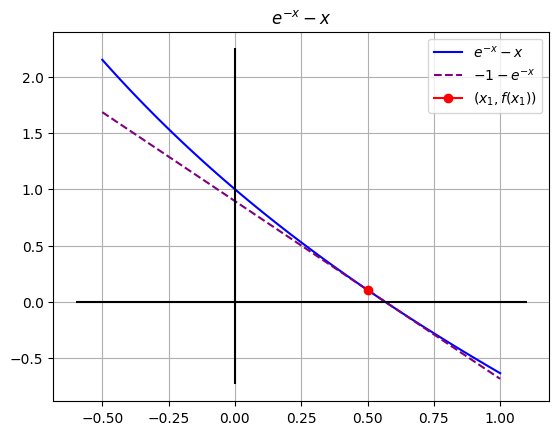

In [ ]:
# @title Gráfica incial de la función y $x_i$ para la iteración 2
import numpy as np
plt.figure()

r = np.linspace(-0.5,1, 100)
fx = [y.subs({x:x_i}) for x_i in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$e^{-x} - x$")

h=0.1
dfx = (y.subs({x:xi+h})-y.subs({x:xi}))/h # derivative
tan = y.subs({x:xi})+dfx*(r-xi)  # tangent
ax.plot(r,tan,color='purple',linestyle='--',label=f"${sp.latex(dy)}$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.1,ymax=max(fx)+0.1,color='k')
ax.hlines(y=0,xmin=min(r)-0.1,xmax=max(r)+0.1,color='k')

## Punto inicial

ax.plot([xi],[fxi], color='red', marker='o', label='$(x_1,f(x_1))$')

ax.set_title("$e^{-x} - x$")
ax.grid()
ax.legend()
plt.show()

In [ ]:
# Calculamos la derivada de la función
dy = y.diff()
print(f"La derivada de la función f(x)={y} -> \t f'(x)= {dy}")

# Evaluemos la derivada en x_i

dfxi = round(dy.subs({x:xi}),4)
print(f"La derivada evaluada en xi f'(xi)= {dfxi}")

La derivada de la función f(x)=-x + exp(-x) -> 	 f'(x)= -1 - exp(-x)
La derivada evaluada en xi f'(xi)= -1.605


In [ ]:
# Calculemos el x_i+1 (siguiente)

xs = round(xi - ((fxi)/(dfxi)),4)
print(f"La raíz supuesta está en x={xs}")

La raíz supuesta está en x=0.5664


<Figure size 640x480 with 0 Axes>

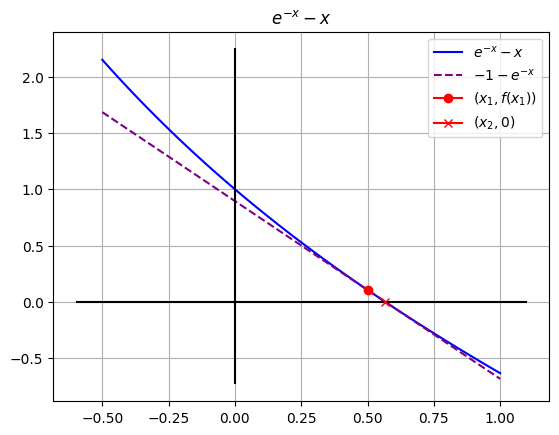

In [ ]:
# @title Gráfica función con el $x_i$ y $x_{i+1}$ calculado
import numpy as np
plt.figure()

r = np.linspace(-0.5,1, 100)
fx = [y.subs({x:x_i}) for x_i in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$e^{-x} - x$")

h=0.1
dfx = (y.subs({x:xi+h})-y.subs({x:xi}))/h # derivative
tan = y.subs({x:xi})+dfx*(r-xi)  # tangent
ax.plot(r,tan,color='purple',linestyle='--',label=f"${sp.latex(dy)}$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.1,ymax=max(fx)+0.1,color='k')
ax.hlines(y=0,xmin=min(r)-0.1,xmax=max(r)+0.1,color='k')

## Punto inicial

ax.plot([xi],[fxi], color='red', marker='o', label='$(x_1,f(x_1))$')
ax.plot([xs],[0], color='red', marker='x', label='$(x_{2},0)$')

ax.set_title("$e^{-x} - x$")
ax.grid()
ax.legend()
plt.show()

In [ ]:
# Calculemos el error
er = np.abs((xs-xi)/(xs)) * 100
print(f"El error del cálculo es: {round(er,1)}%")

El error del cálculo es: 11.7%


In [ ]:
# @title Actualizamos la tabla de iteraciones
nueva_fila = {'xi':xi,'Xi+1':xs,'f(xi)':fxi,"f'(Xi)":dfxi,'er(%)':round(er,4)}
tabla = tabla.append(nueva_fila, ignore_index=True)
tabla.head()

<ipython-input-141-30e46d477870>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append(nueva_fila, ignore_index=True)


,xi,Xi+1,f(xi),f'(Xi),er(%)
0,0,0.5000,1,-2,100.0
1,0.5000,0.5664,0.1065,-1.605,11.72


#### Ahora veamos el algoritmo completo

<Figure size 640x480 with 0 Axes>

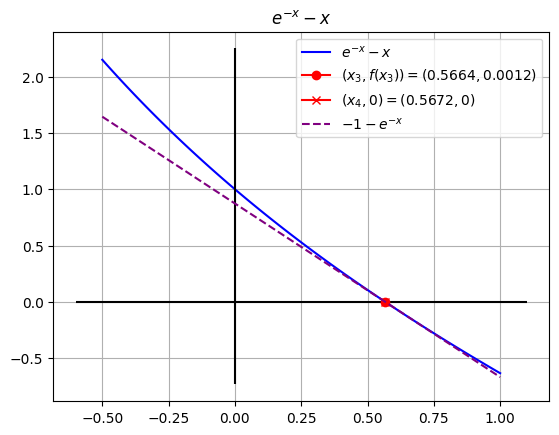

,xi,Xi+1,f(xi),f'(Xi),er(%)
0,0,0.5000,1,-2,100.0
1,0.5000,0.5664,0.1065,-1.605,11.72
2,0.5664,0.5672,0.0012,-1.568,0.1412


In [ ]:
# @title iteremos hasta que el error sea de 1%
from IPython.display import HTML, display, clear_output
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import sympy as sp
import pandas as pd


x = sp.symbols('x')

y = sp.E**(-x)-x
xi = 0

print("La función es: ",y)

columnas = ['xi','Xi+1','f(xi)',"f'(Xi)",'er(%)']
tabla = pd.DataFrame(columns=columnas)

tol = 1

er = tol+1
it = 1

ims = []

while er > tol:
  fxi = round(y.subs({x: xi}), 4)

  ##################
  plt.figure()
  fig, ax = plt.subplots()

  r = np.linspace(-0.5,1, 100)
  fx = [y.subs({x:x_i}) for x_i in r]

  ax.plot(r,fx,color='blue',label="$e^{-x} - x$")

  ## Plano cartesiano (Ejes)
  ax.vlines(x=0,ymin=min(fx)-0.1,ymax=max(fx)+0.1,color='k')
  ax.hlines(y=0,xmin=min(r)-0.1,xmax=max(r)+0.1,color='k')

  ## Punto inicial

  ax.plot([xi],[fxi], color='red', marker='o', label=f'$(x_{it},f(x_{it}))= ({xi},{fxi})$')

  ## Calculemos la derivada
  dy = y.diff()
  ## Evaluemos la derivada en x_i
  dfxi = round(dy.subs({x:xi}),4)

  ## Calculemos el x_i+1 (siguiente)
  xs = round(xi - ((fxi)/(dfxi)),4)
  ax.plot([xs],[0], color='red', marker='x', label=f'$(x_{it+1},0) = ({xs},0)$')

  ## Pintar la recta tangente
  h=0.1
  dfx = (y.subs({x:xi+h})-y.subs({x:xi}))/h # derivative
  tan = y.subs({x:xi})+dfx*(r-xi)  # tangent
  ax.plot(r,tan,color='purple',linestyle='--',label=f"${sp.latex(dy)}$")

  ax.set_title("$e^{-x} - x$")
  ax.grid()
  ax.legend()
  plt.show()

  ## Calculo del error
  er = np.abs((xs-xi)/(xs)) * 100

  ## Actualicemos la tabla de iteraciones
  nueva_fila = {'xi':xi,'Xi+1':xs,'f(xi)':fxi,"f'(Xi)":dfxi,'er(%)':round(er,4)}
  nueva_fila = pd.DataFrame([nueva_fila])
  tabla = pd.concat([tabla, nueva_fila], ignore_index=True)

  display(HTML(tabla.head(it).to_html()))

  #Actualizamos la iteración y el valor de x actual (xi)
  it += 1
  xi = xs

  print("")
  input()
  clear_output(wait=True)



In [ ]:
# @title Grafico dinámico (movie del método)
# Librerias necesarias para realizar el gráfico
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation, rc
from IPython.display import HTML;
import sympy as sp
rc('animation', html='html5');

x = sp.symbols('x')
y = sp.E**(-x)-x
dy = y.diff()
r = np.linspace(-0.5,1, 100)
fx = [y.subs({x:x_i}) for x_i in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$e^{-x} - x$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.1,ymax=max(fx)+0.1,color='k')
ax.hlines(y=0,xmin=min(r)-0.1,xmax=max(r)+0.1,color='k')
ax.set_title("$e^{-x} - x$")
ax.grid()

# Se definen los atributos que debe tener la linea o en este caso el punto que se va a pintar en cada iteracion
linea1, = ax.plot([],[],'o',color = 'r', label = '')
linea2, = ax.plot([],[],'x',color = 'r', label = '')
linea3, = ax.plot([],[],'--',color = 'purple', label = '')

frames = len(tabla)

def graficar(i):

  xg = tabla['xi'].to_list()
  yg = tabla['f(xi)'].to_list()

  xs = tabla['Xi+1'].to_list()
  ys = tabla["f'(Xi)"].to_list()

  linea1.set_data(xg[i],yg[i])
  linea1.set_label(f'$(x_{i},f(x_{i}))= ({xg[i]},{yg[i]})$')


  linea1.set_data(xs[i],0)
  linea2.set_label(f'$(x_{i},0) = ({xs[i]},0)$')

  ## Pintar la recta tangente
  h=0.1
  dfx = (y.subs({x:xg[i]+h})-y.subs({x:xg[i]}))/h # derivative
  tan = y.subs({x:xg[i]})+dfx*(r-xg[i])  # tangent
  linea3.set_data(r,tan)
  linea3.set_label(f"${sp.latex(dy)}$")

  ax.legend()
  return (linea1,linea2,linea3,)

plt.close()



In [ ]:
# Ejecutamos la animación para que se genere y quede en loop mostrando su resultado.
anim = animation.FuncAnimation(fig, graficar, frames=frames, interval=1000,repeat=False)
anim

<ipython-input-150-276efacf074c>:40: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  linea1.set_data(xg[i],yg[i])
<ipython-input-150-276efacf074c>:44: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  linea1.set_data(xs[i],0)


## Ejercicio:

Calcular la raíz  de $f(x) = sin(x) -x $ en el punto $x_i = 0.75$ con una $tol <=1\%$

Implementar una función que me permita dinámicamente modificar la función (pedirla por consola), la tolerancia y el punto inicial, además de la gráfica y que retorne la raíz, el error, la tabla de iteraciones y la gráfica dinámica de como itera el método.

TIP: Indagar sobre los formularios con entradas en COLAB.

NOTA: Modificar el código del método para que se pase por consola la ecuación y se realice el método con esta entrada, mostrando la ecuación en el titulo y en los legend de forma dinámica.